In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

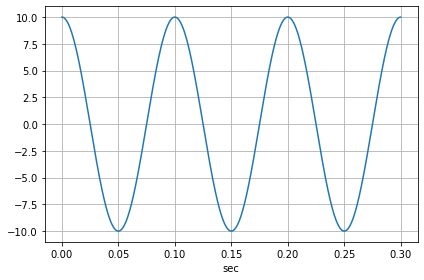

In [2]:
from thinkdsp import CosSignal, SinSignal
import matplotlib.pyplot as plt
cos1 = CosSignal(freq=10, amp=10.0, offset=0)
from thinkdsp import decorate
plt.grid(True)
cos1.plot()
decorate(xlabel='sec')


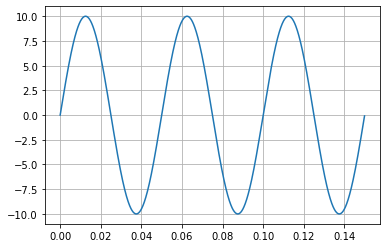

In [3]:
sin1 = SinSignal(freq=20, amp=10, offset=0)
sin1.plot()
plt.grid(True)

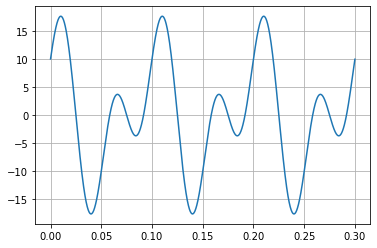

In [4]:
mix = sin1 + cos1
mix.plot()
plt.grid(True)

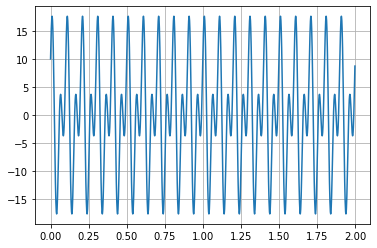

In [5]:
wave = mix.make_wave(duration=2, start=0, framerate=1000)
wave.plot()
plt.grid(True)

In [6]:
wave.duration*wave.framerate

2000.0

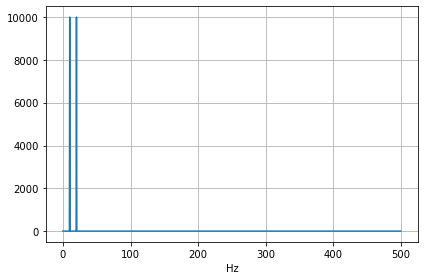

In [7]:
spectrum1 = wave.make_spectrum()
spectrum1.plot()
decorate(xlabel='Hz')
plt.grid(True)

(0.0, 6000.0)

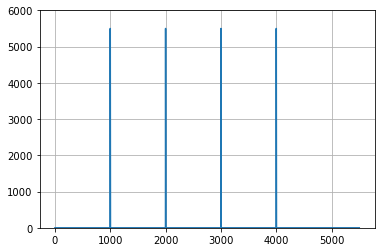

In [8]:
sin1 = SinSignal(freq=1000, amp=2, offset=0)
sin2 = SinSignal(freq=2000, amp=2, offset=0)
sin3 = SinSignal(freq=3000, amp=2, offset=0)
sin4 = SinSignal(freq=4000, amp=2, offset=0)
mix=sin1+sin2+sin3+sin4
wave = mix.make_wave(duration=0.5, framerate=11000)
spectrum= wave.make_spectrum()
spectrum.plot()
plt.grid(True)
plt.ylim((0, 6000))

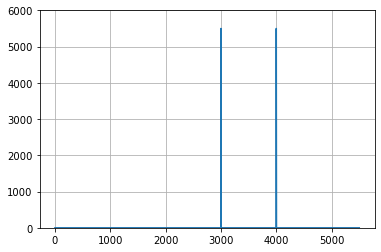

In [9]:
spectrum.high_pass(3000)
spectrum.plot(high=6000)
plt.ylim((0, 6000))
plt.grid(True)



(0.0, 6000.0)

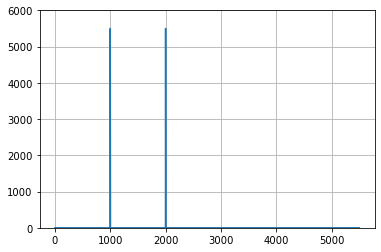

In [10]:
sin1 = SinSignal(freq=1000, amp=2, offset=0)
sin2 = SinSignal(freq=2000, amp=2, offset=0)
sin3 = SinSignal(freq=3000, amp=2, offset=0)
sin4 = SinSignal(freq=4000, amp=2, offset=0)
mix=sin1+sin2+sin3+sin4
wave = mix.make_wave(duration=0.5, framerate=11000)
spectrum= wave.make_spectrum()
spectrum.low_pass(2001)
spectrum.plot()
plt.grid(True)
plt.ylim((0, 6000))


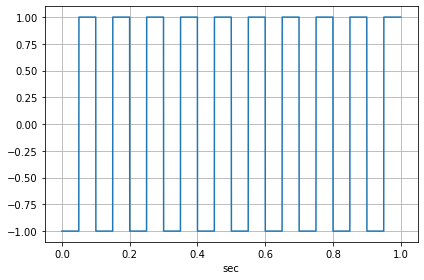

In [11]:
from thinkdsp import SquareSignal

signal = SquareSignal(10)

duration = signal.period*10
segment = signal.make_wave(duration, framerate=10000)
segment.plot()
decorate(xlabel='sec')
plt.grid(True)

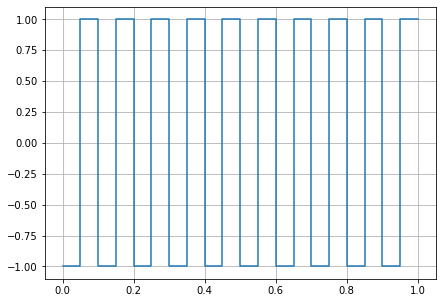

In [12]:
def square_wave(origin, size, ratio, x_unit, y0, y1):
    d = []
    for  start in np.arange(origin, origin + x_unit * size, x_unit):
        d.append((start, y0))
        middle = start + x_unit * ratio
        d.append((middle, y0))
        d.append((middle, y1))
        end = start + x_unit
        d.append((end, y1))
        
    return d
import numpy as np
import matplotlib.pyplot as plt

d = np.array(square_wave(origin=0, size=10, ratio=0.5, x_unit=0.1, y0=-1, y1=1))
plt.figure(figsize=(7, 5))
plt.plot(d[:, 0], d[:, 1])
plt.grid(True)
# plt.plot(d[:, 1], d[:, 1])

(3.1)
Aliasing為聲音被折疊，取樣頻率低於2倍最高訊號頻率而導致失真、原先的弦波被錯誤的取樣弦波取代，這個現象稱為aliasing，舉例當你framerate設為10000時，此時對稱點為5000，若頻率超過5000的都會被折疊，像是6000會被折疊到4000因為6000跟5000差1000而5000-1000為4000，若折疊後的值小於0那麼則要再對折，像是11000為-1000再對折為1000。


(3.2)
當取樣頻率為原訊號之最高頻率之兩倍以上時，就可以正確的重建原始訊號，進而避免Aliasing


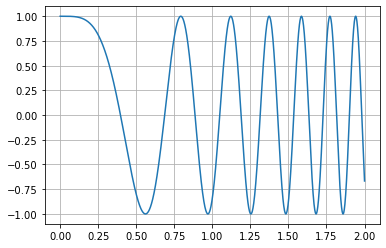

In [17]:
import numpy as np
import matplotlib.pyplot as pl 
from thinkdsp import Wave
a=10 
sampleRate=1000 
t=np.linspace(0,2,2*sampleRate+1) 
x=np.cos(a*t**2)
w =Wave(x, framerate=sampleRate)
w.plot()
pl.grid(True)

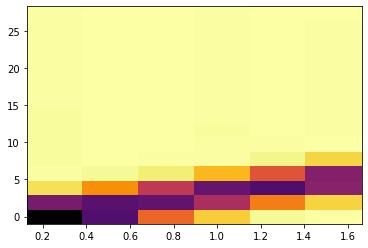

In [18]:
spectrum=w.make_spectrogram(seg_length=512)
spectrum.plot(high=30)